In [31]:
#Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
#Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [33]:
#Reading the processed data
df_new = pd.read_csv('Processed_features.csv')

In [35]:
# Removing 1st column as it contains index id (0,1,2,...,4186) [created due to printing of df into csv]
df_new = df_new.drop(df_new.columns[0],axis=1)

In [36]:
# Storing the 'Net New Money Details-YTD NNM \n(March-2018)' feature in a new variable and removing it from the dataset

y = df_new['Net New Money Details-YTD NNM \n(March-2018)']
X = df_new.drop('Net New Money Details-YTD NNM \n(March-2018)', axis = 1)

### _Deal with multicollinearity_

Multicollinearity is troublesome to detect because it emerges when three or more variables are highly correlated. It can emerge even when isolated pairs of variables are not collinear.

To deal with this issue, we will use the "VIF()" function which can detect multicollinearity.

In [37]:
# For each X, calculate VIF and save in dataframe

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [38]:
vif.sort_values(by=['VIF Factor'], ascending=False)

,VIF Factor,features
55,inf,Client Acquisition Details-$1M+ QNR's 2016
50,inf,Client Acquisition Details-QNR 2015
51,inf,Client Acquisition Details-QNR 2016
52,inf,Client Acquisition Details-QNR 2017
53,inf,Client Acquisition Details-3 year cumm. QNR
57,inf,Client Acquisition Details-3 year cumm. $1m+ QNR
56,inf,Client Acquisition Details-$1M+ QNR's 2017
54,9.007199e+15,Client Acquisition Details-$1M+ QNR's 2015
0,2.081035e+02,FA Details-I-LOS
1,1.427376e+02,FA Details-Rocket-LOS


There are many features with high variance inflation factor because they "explain" the same variance within this dataset. We will discard one of these variables before moving on to model building to prevent high multicollinearity. We will have to test VIF many times to properly remove these features. For simplicity, we will only print the final VIF at the end.

In [39]:
df_new = df_new.drop(['Client Acquisition Details-$1M+ QNR\'s 2015', 
                      'Client Acquisition Details-$1M+ QNR\'s 2016',
                      'Client Acquisition Details-QNR 2015',
                      'Client Acquisition Details-QNR 2016',
                      'Client Acquisition Details-QNR 2017',
                      'Client Acquisition Details-$1M+ QNR\'s 2017',
                      'Segment Index Score (All FA Score)-Client Acquisition Score', 
                      'Segment Index Score (All FA Score)-Marketing Score',
                      'Segment Index Score (All FA Score)-Banking Score',
                      'Segment Index Score (All FA Score)-Client Retention'], axis=1)

In [40]:
df_new = df_new.drop(['FA Details-I-LOS',
                      'FA Details-T12\n(Feb 2018)',
                      'FA Details-Rec. Council 2018_Not Given',
                      'FA Details-Rocket-LOS',
                      'FA Details-Rocket Lifecycle Stage_Recruits with >1 to <5 Yrs Left on EFL',
                      'FA Details-AuM YE 17'], axis=1)

In [41]:
df_new = df_new.drop(['Product Mix (Assets)-EQUITY',
                      'Product Mix (Rev)-Advisory %',
                      'Product Mix (Assets)-Wrap %',
                      'Banking and Lending-SBL: H/UHNW MHHs Approved CLs (#)'], axis=1)

In [42]:
df_new = df_new.drop(['Digital Tools-% of MHHs on OLS'], axis=1)

In [43]:
df_new = df_new.drop(['Net New Money Details-# of NNM Years +',
                      'Net New Money Details-Color_Orange',
                      'Net New Money Details-Color_Green'], axis=1)

In [44]:
df_new = df_new.drop(['FA Details-Production Quintile_5.0',
                      'FA Details-Production Quintile_4.0',
                      'FA Details-Production Quintile_3.0',
                      'FA Details-Production Quintile_2.0'], axis=1)

In [45]:
X_vif_2 = df_new.drop('Net New Money Details-YTD NNM \n(March-2018)', axis = 1)
# For each X, calculate VIF and save in dataframe
vif_2 = pd.DataFrame()
vif_2["VIF Factor"] = [variance_inflation_factor(X_vif_2.values, i) for i in range(X_vif_2.shape[1])]
vif_2["features"] = X_vif_2.columns
vif_2.sort_values(by=['VIF Factor'], ascending=False)

,VIF Factor,features
72,14.234858,Client Age Distribution (% of MHHs by Age)-65-...
121,13.834150,Maketing Details-FA Web_1.0
71,11.673863,Client Age Distribution (% of MHHs by Age)-55-...
66,11.478011,Banking and Lending-SBL: H/UHNW MHHs Approved ...
73,11.041609,Client Age Distribution (% of MHHs by Age)-75+...
12,10.749348,Product Mix (Rev)-ADVISORY
43,10.073483,Client Acquisition Details-3 year cumm. QNR
56,8.871242,Wealth/Financial Planning -MHHs with a Plan
55,8.802621,Wealth/Financial Planning -Total MHHs
0,8.520305,FA Details-Yrs. Left on EFL\n(Feb 2018)


In [46]:
df_new.shape

(4186, 124)

# Using Lasso Model with standardization

Dataset is transformed to use Lasso linear regression model. Lasso picks out the top performing features, while forcing other features to be close to zero.

In [47]:
# Removing outlier

from scipy import stats
df_new_out = df_new[(np.abs(stats.zscore(df_new)) < 10).all(axis=1)]
df_new_out.shape

(3967, 124)

In [48]:
y_out = df_new_out['Net New Money Details-YTD NNM \n(March-2018)']
X_out = df_new_out.drop('Net New Money Details-YTD NNM \n(March-2018)', axis = 1)

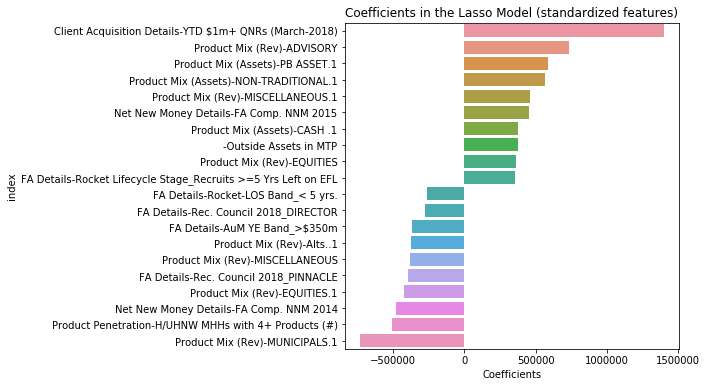

In [50]:
# Model training with standardized features and cross validation

from sklearn.preprocessing import StandardScaler

# Scale data
standard_scaler = StandardScaler()
X_out_s = standard_scaler.fit_transform(X_out)
X_out_s_df = pd.DataFrame(X_out, columns = X_out.columns)

from sklearn.linear_model import LassoCV

reg_out = LassoCV(cv=5, alphas=[10, 20], random_state=0).fit(X_out_s, y_out)

# Create dataframe of features and their respective coefficients
coef = pd.DataFrame(reg_out.coef_, index = X_out_s_df.columns)
coef.columns = ['Coefficients']
coef.sort_values(by='Coefficients', ascending=False, inplace=True)

# Filter most positive and negative coefficients
coef_plot = pd.concat([coef.head(10), coef.tail(10)])

# Plot 
a1_dims = (6, 6)
fig, ax = plt.subplots(figsize=a1_dims)
plt.title("Coefficients in the Lasso Model (standardized features)")
sns.barplot(y='index', x='Coefficients', data=coef_plot.reset_index(), ax=ax)

In [52]:
# Selecting top features

coef_standardized_abs = coef.reindex(coef.Coefficients.abs().sort_values(ascending=False).index)
coef_standardized_selected = coef_standardized_abs.head(20).reset_index()
coef_standardized_selected.columns = ['Feature', 'Important']
coef_standardized_selected.loc[:, 'Important'] = 1
coef_standardized_selected

,Feature,Important
0,Client Acquisition Details-YTD $1m+ QNRs (Marc...,1
1,Product Mix (Rev)-MUNICIPALS.1,1
2,Product Mix (Rev)-ADVISORY,1
3,Product Mix (Assets)-PB ASSET.1,1
4,Product Mix (Assets)-NON-TRADITIONAL.1,1
5,Product Penetration-H/UHNW MHHs with 4+ Produc...,1
6,Net New Money Details-FA Comp. NNM 2014,1
7,Product Mix (Rev)-MISCELLANEOUS.1,1
8,Net New Money Details-FA Comp. NNM 2015,1
9,Product Mix (Rev)-EQUITIES.1,1
